# Level 3 – Task 3: Data Visualization



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Dataset data science.csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 1. Distribution of Aggregate Ratings (Histogram)


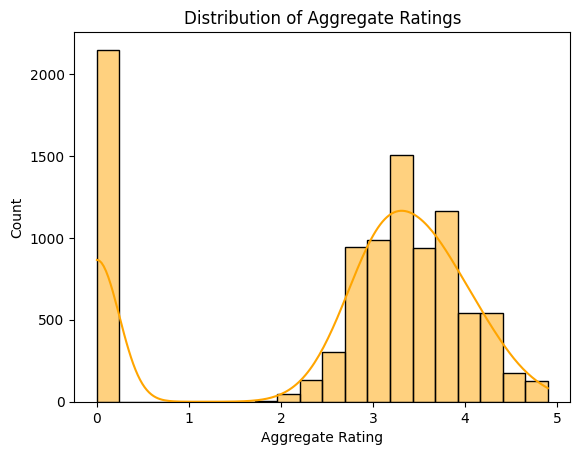

In [3]:
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='orange')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()


## 2. Compare Average Ratings of Different Cuisines


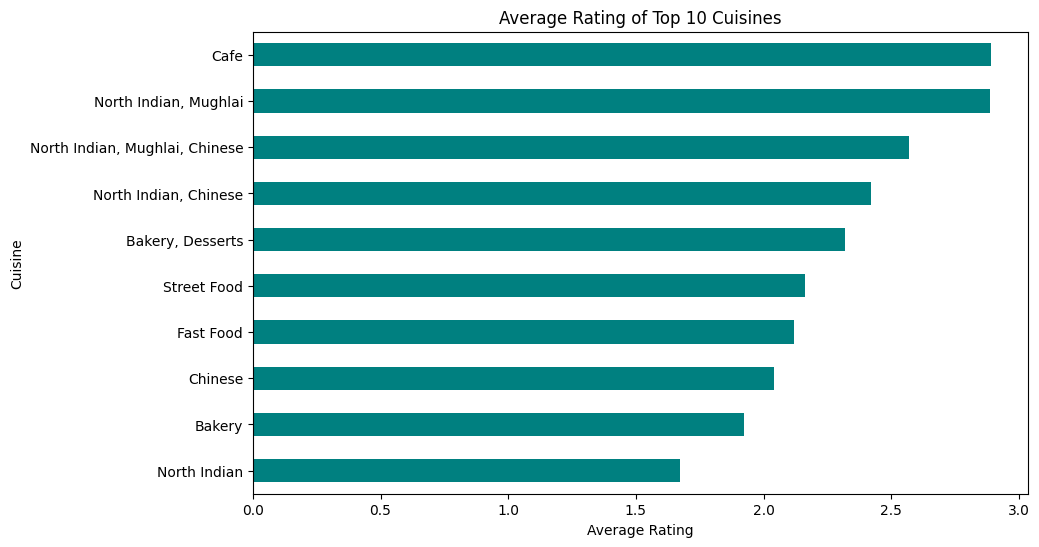

In [4]:
top_cuisines = df['Cuisines'].value_counts().nlargest(10).index
avg_rating_by_cuisine = df[df['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean()

avg_rating_by_cuisine.sort_values().plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Average Rating of Top 10 Cuisines")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()


## 3. Compare Average Ratings of Different Cities


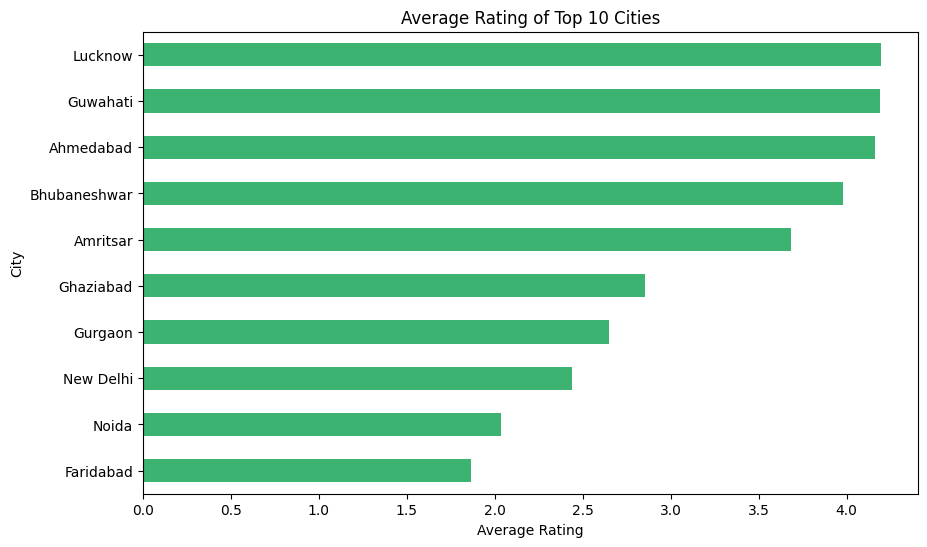

In [5]:
top_cities = df['City'].value_counts().nlargest(10).index
avg_rating_by_city = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean()

avg_rating_by_city.sort_values().plot(kind='barh', figsize=(10, 6), color='mediumseagreen')
plt.title("Average Rating of Top 10 Cities")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()


## 4. Correlation Heatmap of Numerical Features


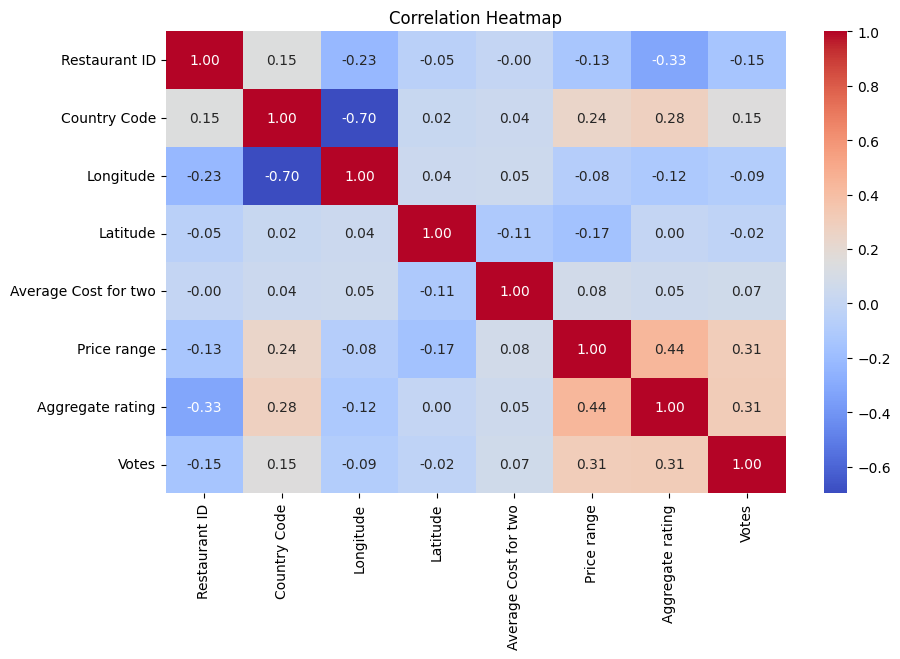

In [6]:
# Select numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).dropna(axis=1)
corr = numerical_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 5. Scatter Plot – Votes vs Aggregate Rating


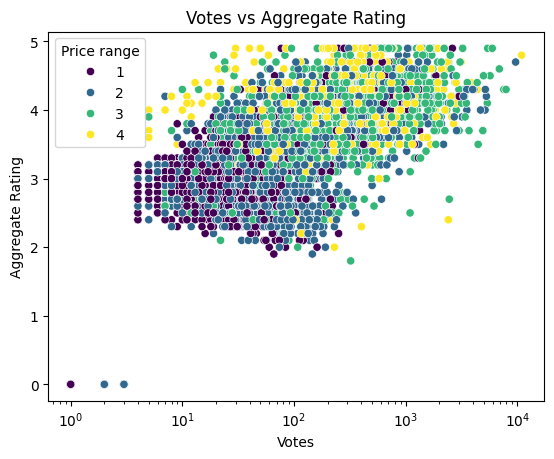

In [7]:
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', hue='Price range', palette='viridis')
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.xscale('log')  # use log scale to reduce skew
plt.show()
